# Sentiment Analysis Amazon Reviews

In [1]:
import numpy as np 
import pandas as pd

df = pd.read_csv('Amazon_Consumer_Reviews.csv')
df.shape

(28332, 19)

28332 rows, 19 columns.

Let's see if there any duplicates

In [2]:
dups = df[df.duplicated(keep='last')]
dups.shape

(0, 19)

No duplicates, check for null data

In [3]:
null_data = df[df.isnull().values.any(axis=1)]
null_data.shape

(12217, 19)

There are some null values. See if any nulls in the fields we care about.

In [4]:
null_data.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateSeen,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2017-03-02T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-08-31T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-12-06T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-03-28T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2017-04-22T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda


Nulls in reviews.numHelpful which is not useful in this analysis.

Check for nulls in fields we do care about: reviews.rating and reviews.text

In [5]:
def has_null(colName, data):
    is_null = pd.isnull(data[colName]) 
    return data[is_null]

print('reviews.rating: ', has_null('reviews.rating', null_data).shape)
print('reviews.text: ', has_null('reviews.text', null_data).shape)

reviews.rating:  (0, 19)
reviews.text:  (0, 19)


No nulls in the fields we care about. Let's look at the field types

In [6]:
df.dtypes

id                     object
dateAdded              object
dateUpdated            object
name                   object
asins                  object
brand                  object
categories             object
primaryCategories      object
keys                   object
manufacturer           object
manufacturerNumber     object
reviews.date           object
reviews.dateSeen       object
reviews.numHelpful    float64
reviews.rating          int64
reviews.sourceURLs     object
reviews.text           object
reviews.title          object
reviews.username       object
dtype: object

In [7]:
# ratings distribution
df['reviews.rating'].value_counts()

5    19897
4     5648
3     1206
1      965
2      616
Name: reviews.rating, dtype: int64

Most of the reviews are 4 stars and up.

We will create a derived field with binary values for negative and postive for our ML model. Treat 4-stars and above as positive and everything else negative.

In [8]:
# Add new sent_label for use in supervised machine learning

def senti(x):
    if x <= 3:
        return 0
    return 1

df['sent_label'] = df['reviews.rating'].apply(senti)

target_count = df['sent_label'].value_counts(normalize = True)
target_count

1    0.901631
0    0.098369
Name: sent_label, dtype: float64

negative reviews make up less than 10% of all reviews, which is very imbalanced

Text length visualization.

# Basic EDA

visualizing review ratings

In [9]:
print('original review ratings')
df['reviews.rating'].describe()

original review ratings


count    28332.000000
mean         4.514048
std          0.934957
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: reviews.rating, dtype: float64

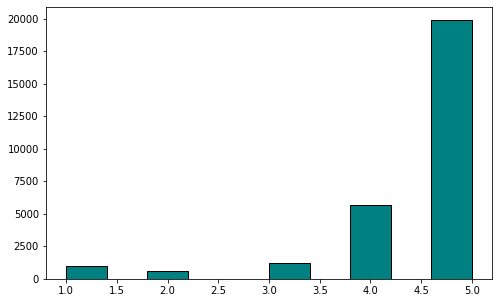

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
plt.hist(df['reviews.rating'], color = 'teal', edgecolor = 'black', bins=10);

visualizing positive and negative reviews derived from review ratings

In [11]:
print('derived sentiment label')
df['sent_label'].describe()

derived sentiment label


count    28332.000000
mean         0.901631
std          0.297819
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: sent_label, dtype: float64

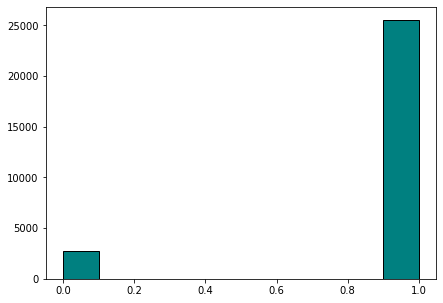

In [12]:
plt.figure(figsize=(7, 5))
plt.hist(df['sent_label'], color = 'teal', edgecolor = 'black', bins=10);

visualizing review text length

In [13]:
print('review text length')
df['reviews.text'].str.len().describe()

review text length


count    28332.000000
mean       137.517118
std        199.877736
min          1.000000
25%         54.000000
50%         87.000000
75%        162.000000
max       8351.000000
Name: reviews.text, dtype: float64

average review has 137 characters, but there are some long reviews. Let's inspect some of these

In [14]:
longreviews = df[df['reviews.text'].str.len()>8000]

print(longreviews.index)
longreviews.shape

Int64Index([15434, 15435, 18411, 24278], dtype='int64')


(4, 20)

In [15]:
print(df.iloc[15434]['reviews.text'])

I've had lots of tablets in the past, mostly from the Samsung line, but this is my first Amazon Fire, so I want to write this review for others who have never tried one of these. At the time that this was written, Alexa had not been added to the tablet.First, while this device runs an Android type of operating system, Amazon puts its own spin on the operating system. I don't feel like I'm using Android. This feels different to me. It doesn't have the same level of customization that Android users have come to appreciate. That being said, if you are an Amazon Prime member, this device has been tailored to be your content entertainment machine. It's simply a fun way to consume your magazines, books, etc.There are 3 on-screen buttons on the bottom of the device. The middle button immediately takes you to your home screen. The button to the left acts as a sort of "back" button. It also lets me get rid of my keyboard when I don't need it on screen, but it's open. The button to the right is 

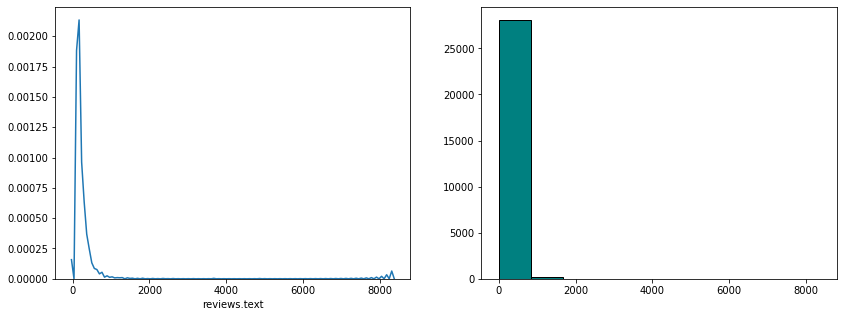

In [16]:
f, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=True)

plt.hist(df['reviews.text'].str.len(), color = 'teal', edgecolor = 'black')
sns.distplot(df['reviews.text'].str.len(), hist=False, ax=axes[0]);

# visualizing review word length

In [17]:
print('review word length')
df['reviews.text'].str.split().map(lambda x: len(x)).describe()

review word length


count    28332.000000
mean        25.945009
std         37.075899
min          1.000000
25%         10.000000
50%         17.000000
75%         31.000000
max       1539.000000
Name: reviews.text, dtype: float64

average word length is 25.

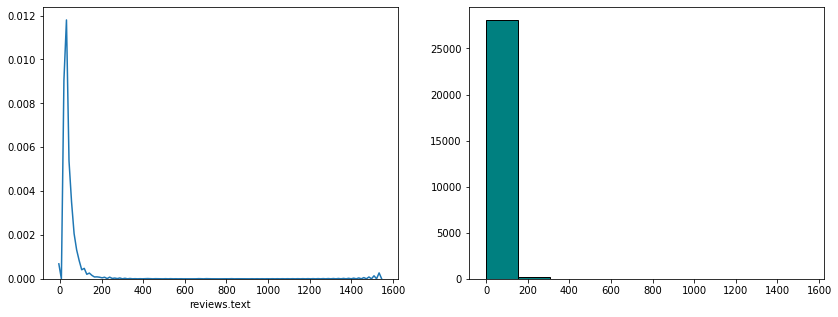

In [18]:
f, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=True)

plt.hist(df['reviews.text'].str.split().map(lambda x: len(x)), color = 'teal', edgecolor = 'black');
sns.distplot(df['reviews.text'].str.split().map(lambda x: len(x)), hist=False, ax=axes[0] );

# top positive and negative reviews

In [19]:
# top 10 positive reviews with a word length greather than 5
top_pos = df[df['reviews.text'].str.split().map(lambda x: len(x)) > 5].sort_values("reviews.rating", 
                ascending = False)[["reviews.text"]].head(10)

for index, row in top_pos.iterrows():
    print(top_pos.loc[index]['reviews.text'], '\n')

Enjoy the multifaceted opportunities that are available with the Kindle 

Love this tablet! Highly recommended, especially for a toddler who's learning. Has lots of games and activities for learning, parental controls, which I find extremely necessary for the internet today! 

I previously purchased two of these for two other grandkids and they just love them and so does mom. She can set time limits, can limit access, and much more. Plus it comes with a two year guarantee , if the child breaks it, they will replace it. Did I mention that there is a sd expansion card slot to increase the storage capacity. These grandkids are 4 to 8 in age, but older kids would enjoy this also. 

Easy to use, lots of features, keeps kids interested, good beginner tablet unit 

My Grandson loves his tablet we got him. Very safe 

This a great item for kids to learn how to use electronics. 

This met my expectations and more. My granddaughter loves it. It's user friendly and has unlimited options for her. 

In [20]:
# bottom 10 negative reviews with a word length greather than 5
top_neg = df[df['reviews.text'].str.split().map(lambda x: len(x)) > 5].sort_values("reviews.rating", 
                ascending = False)[["reviews.text"]].tail(10)

for index, row in top_neg.iterrows():
    print(top_neg.loc[index]['reviews.text'], '\n')

I thought this would be a great gift for a child until I got to the set up. The set up could not be completed unless a credit card number was entered. I refuse to put that type of information in the hands of a child so, I returned it. 

7 year old boy broke it in less than 2 months even with the bumper guard on. Won't power up. When it WAS working, very limited on storage. Ran out of space in 1 hour, so the wifi wouldn't work. Had go in and explain to him he couldn't download more than a hand full of apps at a time. Doesn't matter now since it won't even turn on or charge. 

The ads that pop up constantly make us almost unusable for kids. 

It takes forever to download apps. I'm returning it will be getting something else. 

The reviews on this on Amazon seemed awesome. Little did I know that there is a chronic problem with the port on these tablets. We just bought this for Christmas and went to charge it for the first time. Nothing. We already loaded (and paid for) several apps, and n

# Vader lexicon-based sentiment

Vader is attuned to social media lexicon and relies on punctuation and capitalizatin for scoring of sentiment. Hence minmal processing is required.

Vader Doc: https://github.com/cjhutto/vaderSentiment#about-the-scoring 
Vader lexicon: https://raw.githubusercontent.com/cjhutto/vaderSentiment/master/vaderSentiment/vader_lexicon.txt

positive sentiment: compound score >= 0.05
neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
negative sentiment: compound score <= -0.05
The pos, neu, and neg scores are ratios for proportions of text that fall in each category, so these should all add up to be 1 or close to it.

In [21]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
from nltk import tokenize

sid_obj = SentimentIntensityAnalyzer() 

threshold = 0.05

# decide sentiment as positive, negative, neutral will be treated as negative
def sentiment_score(text, verbose=False): 
  
    dic = sid_obj.polarity_scores(text) 
    if verbose:
        print(text, dic)   
  
    compound = dic['compound']

    if compound >= threshold : 
        return 1 # Positive
    elif compound <= -threshold : 
        return 0 # Negative
    else : 
        return 0 # Neutral 
    
# handle multiple sentences in text. Return based on highest count
def sentiment_score2(text, verbose=False): 
    pos_count = 0
    count=0
    
    sentences = tokenize.sent_tokenize(text)
    
    for s in sentences:
        dic =  sid_obj.polarity_scores(s)
        if verbose:
            print(s, dic)
            
        compound = dic['compound']
        
        if compound >= .05 : 
            pos_count+=1 #Positive
        count+=1
    
    pos_ratio = pos_count/count
    if verbose:
        print ('pos_ratio: ', pos_ratio)
        
    # if number of positive scores is < .5
    if (pos_ratio) < 0.5:
        return 0
    else:
        return 1
        
  
# test
print('sentiment: ', sentiment_score('VADER Sentiment looks interesting!', True))
print('sentiment: ', sentiment_score('VADER Sentiment is confusing, not sure about this!', True))
print('sentiment: ', sentiment_score('VADER Sentiment is BAD!', True))

VADER Sentiment looks interesting! {'neg': 0.0, 'neu': 0.501, 'pos': 0.499, 'compound': 0.4574}
sentiment:  1
VADER Sentiment is confusing, not sure about this! {'neg': 0.409, 'neu': 0.591, 'pos': 0.0, 'compound': -0.486}
sentiment:  0
VADER Sentiment is BAD! {'neg': 0.601, 'neu': 0.399, 'pos': 0.0, 'compound': -0.6731}
sentiment:  0


# add a column for the vader score

Utility function sentiment_score2 was added to account for multiple sentences.

sentiment_score which processes the entire review as a single unit, had poorer performance overall in detecting negative reviews

In [22]:
# don't treat individual sentences
df['vader_score'] = df['reviews.text'].apply(sentiment_score)

# Compare vader against the derived sentiment score based on review rating

In [23]:
print('positive reviews')
positives = df[df['sent_label'] == 1]
print(positives.shape)
positives['reviews.text']

positive reviews
(25545, 21)


1        Bulk is always the less expensive way to go fo...
2        Well they are not Duracell but for the price i...
3        Seem to work as well as name brand batteries a...
4        These batteries are very long lasting the pric...
5        Bought a lot of batteries for Christmas and th...
                               ...                        
28327    I got 2 of these for my 8 yr old twins. My 11 ...
28328    I bought this for my niece for a Christmas gif...
28329    Very nice for light internet browsing, keeping...
28330    This Tablet does absolutely everything I want!...
28331    At ninety dollars, the expectionations are low...
Name: reviews.text, Length: 25545, dtype: object

In [24]:
print('negative reviews')
negatives = df[df['sent_label'] == 0]

print(negatives.shape)
negatives['reviews.text']

negative reviews
(2787, 21)


0        I order 3 of them and one of the item is bad q...
8        These do not hold the amount of high power jui...
11       When I first started getting the Amazon basic ...
16       I don't know if I would buy thus brand again s...
17       In my opinion these did not last anywhere near...
                               ...                        
28265    was cheap, can not run chrome stuff, returned ...
28268    Didn't have some of the features I was looking...
28269    My Hulu plays perfectly..great volume. Kindle ...
28285    Worked great but after awhile I wouldn't unloc...
28318    The tablet works fine. It is responsive with g...
Name: reviews.text, Length: 2787, dtype: object

# look at positive accuracy

In [25]:
v_pos = positives['vader_score'].value_counts()
print(v_pos)

print ('\naccuracy of positive: ', v_pos[1]/positives.shape[0] * 100)

1    22739
0     2806
Name: vader_score, dtype: int64

accuracy of positive:  89.01546290859268


some reviews scored as negative, even though they are in the positive bucket. Let's take a look at a few of these.

In [26]:
x = positives[(positives['vader_score'] == 0)]
x[["reviews.text", "reviews.rating", "sent_label", 'vader_score']].head()

,reviews.text,reviews.rating,sent_label,vader_score
23,they seemed to not last as long as other name ...,4,1,0
48,"GOT THE 48 PACK, I USEDD THEM UP FASTER THAN I...",4,1,0
57,They're batteries!,5,1,0
75,Got it and it's already in use.,5,1,0
77,lasts just as long as duracell,4,1,0


let's get a detail view of how vader scored these reviews which are suppose to be positive

In [27]:
for index, row in x.head(5).iterrows():
    s = x.loc[index]['reviews.text']
    print (sentiment_score(s, True))

they seemed to not last as long as other name brand names disappointed! {'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5255}
0
GOT THE 48 PACK, I USEDD THEM UP FASTER THAN I THOUGHT I WOULD!!,SO IM ORDERING MORE !! SO IM ORDERING MORE NOW {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
0
They're batteries! {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
0
Got it and it's already in use. {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
0
lasts just as long as duracell {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
0


- review 1 looks, correctly negative even though it has a 4-rating
- review 2,3,4,5 are labeled as neutral and we're treating these as negative


# look at negative accuracy

In [28]:
v_neg = negatives['vader_score'].value_counts()
print(v_neg)

print ('\naccuracy of negative:', v_neg[0]/negatives.shape[0] * 100)

0    1592
1    1195
Name: vader_score, dtype: int64

accuracy of negative: 57.12235378543237


accuracy is not very good for those marked as negtive. Let's take a look at a couple. Here, I'm looking at reviews lower than a rating of 3

In [29]:
y = negatives[(negatives['vader_score'] == 1) & (negatives['reviews.rating'] <3)]
y[["reviews.text", "reviews.rating", "sent_label", 'vader_score']].head()

,reviews.text,reviews.rating,sent_label,vader_score
16,I don't know if I would buy thus brand again s...,1,0,1
17,In my opinion these did not last anywhere near...,2,0,1
45,These batteries don't last even in a simple di...,1,0,1
47,"Date on the back of these were 1992. Yeah, 199...",1,0,1
180,Use these in a wireless BT mouse. Has about 30...,2,0,1


In [30]:
for index, row in y.head(5).iterrows():
    s = y.loc[index]['reviews.text']
    print (sentiment_score(s, True))

I don't know if I would buy thus brand again seems like they don't last as long as Duracell {'neg': 0.0, 'neu': 0.878, 'pos': 0.122, 'compound': 0.3612}
1
In my opinion these did not last anywhere near as long as Duracel in things like LED candles (which is crazy) and trail cameras. Cameras were not exposed to cold temps more or less than other batteries. WE buy in bulk for the north house. Amazon Basics is great for things like sheets and beeding and towels. In my opinion the battery life, in the large package of aaa and aa size we purchased were lacking. {'neg': 0.028, 'neu': 0.829, 'pos': 0.142, 'compound': 0.8235}
1
These batteries don't last even in a simple digital clock. 2 weeks at best. {'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'compound': 0.6369}
1
Date on the back of these were 1992. Yeah, 1992. Inedible. {'neg': 0.0, 'neu': 0.82, 'pos': 0.18, 'compound': 0.296}
1
Use these in a wireless BT mouse. Has about 30 less life as copper top brand. Good price, but most likely will not

review 1, 2, 3, 4, 5 was scored positive though they appear negative
Using the Vader compound threshold of .05 as per Vader documentation does not perform well across the board

# Machine-learning based sentiment

Reference
https://datascienceplus.com/multi-class-text-classification-with-scikit-learn/
https://towardsdatascience.com/how-to-train-test-split-kfold-vs-stratifiedkfold-281767b93869

In [31]:
df[['reviews.rating', 'reviews.text','reviews.title', 'sent_label', 'vader_score' ]].head()

,reviews.rating,reviews.text,reviews.title,sent_label,vader_score
0,3,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,0,0
1,4,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,1,1
2,5,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,1,1
3,5,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,1,1
4,5,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,1,1


# cleaning data

In [32]:
import string
from nltk import pos_tag,  word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
def clean_text(text):
    
    useless_words = stopwords.words("english") + list(string.punctuation)
    
    text = text.lower() 
    text = [w for w in word_tokenize(text) if w not in useless_words]  # stop, punctuation removal
    text = [word for word in text if not any(c.isdigit() for c in word)]  # remove words with numbers                                   
    
    # parts of speech tagging and lemmatize text
    pos_tags = pos_tag(text)
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
   
    text = " ".join(text)
    return(text)

    
# test clean message
data = df['reviews.text'][0]
print ('orignal before cleaning\n')
print (data)

print('after cleaning\n')
print(clean_text(data))

orignal before cleaning

I order 3 of them and one of the item is bad quality. Is missing backup spring so I have to put a pcs of aluminum to make the battery work.
after cleaning

order one item bad quality miss backup spring put pc aluminum make battery work


In [33]:
# clean text data
df["review_clean"] = df["reviews.text"].apply(lambda x: clean_text(x))
df[['reviews.text','review_clean', 'sent_label', 'vader_score' ]].head()

,reviews.text,review_clean,sent_label,vader_score
0,I order 3 of them and one of the item is bad q...,order one item bad quality miss backup spring ...,0,0
1,Bulk is always the less expensive way to go fo...,bulk always less expensive way go product like,1,1
2,Well they are not Duracell but for the price i...,well duracell price happy,1,1
3,Seem to work as well as name brand batteries a...,seem work well name brand battery much good price,1,1
4,These batteries are very long lasting the pric...,battery long lasting price great,1,1


Word Cloud positive and negative reviews

Positive Reviews Word Cloud



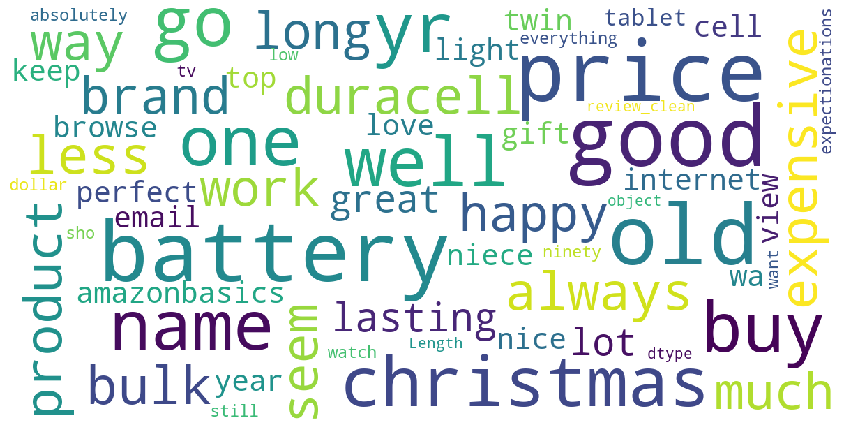

Negative Reviews Word Cloud



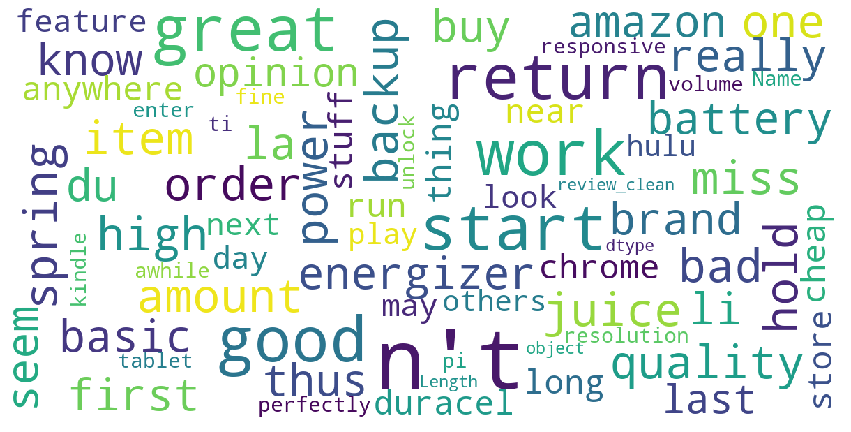

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 1
    ).generate(str(data))

    fig = plt.figure(1, figsize = (15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
print('Positive Reviews Word Cloud\n')
positives = df[df['sent_label'] == 1]
show_wordcloud(positives['review_clean'])


print('Negative Reviews Word Cloud\n')
negatives = df[df['sent_label'] == 0]
show_wordcloud(negatives['review_clean'])

# train, test, split, predict

The data used in supervised learning contains features and a label for a set of observations. The algorithms try to model the relationship between features (independent variables) and label (dependent variable). We first train the model by providing both features and label for some observations. Then test the model by only providing features and expecting it to predict the labels. Thus, we need to split the data into training and test subsets.

Scikit-learn library provides many tools to split data into training and test sets. The most basic one is train_test_split which divides data into 2 parts as specified by the partitioning ratio. If we split data using train_test_split, we can only train a model with the portion set aside for training.

In [35]:
# helper function
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix as cm
import matplotlib.pyplot as plt

def getPerformance(y_true, y_pred):
    
    print(classification_report(y_true, y_pred))

    score = round(accuracy_score(y_true, y_pred),3) 
    cm1 = cm(y_true, y_pred)
    sns.heatmap(cm1, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title('Accuracy Score: {0}'.format(score), size = 12)
    plt.show()

RandomForestClassifier
Params: {'tfidfvectorizer': TfidfVectorizer(min_df=5, ngram_range=(1, 2)), 'randomforestclassifier': RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=10, random_state=1)}

              precision    recall  f1-score   support

           0       0.80      0.65      0.72       561
           1       0.96      0.98      0.97      5106

    accuracy                           0.95      5667
   macro avg       0.88      0.82      0.85      5667
weighted avg       0.95      0.95      0.95      5667



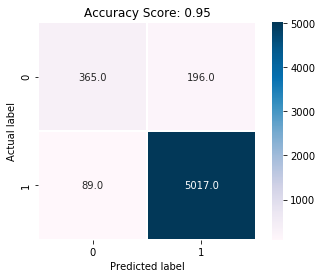


MultinomialNB
Params: {'tfidfvectorizer': TfidfVectorizer(min_df=5, ngram_range=(1, 2)), 'multinomialnb': MultinomialNB()}

              precision    recall  f1-score   support

           0       0.97      0.22      0.36       561
           1       0.92      1.00      0.96      5106

    accuracy                           0.92      5667
   macro avg       0.95      0.61      0.66      5667
weighted avg       0.93      0.92      0.90      5667



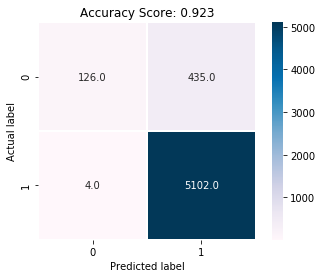


LogisticRegression
Params: {'tfidfvectorizer': TfidfVectorizer(min_df=5, ngram_range=(1, 2)), 'logisticregression': LogisticRegression(random_state=1)}

              precision    recall  f1-score   support

           0       0.91      0.35      0.51       561
           1       0.93      1.00      0.96      5106

    accuracy                           0.93      5667
   macro avg       0.92      0.67      0.74      5667
weighted avg       0.93      0.93      0.92      5667



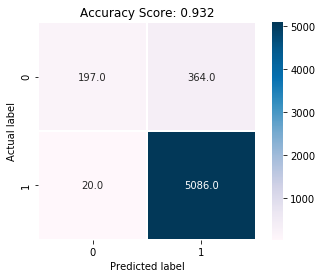

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB


# split data into train and test
# default value of shuffle is True so data will be randomly splitted 
X_train, X_test, y_train, y_test = train_test_split(df['review_clean'], df['sent_label'], 
                                                    test_size=0.2, random_state=1)

# vectorizaton: transformer params
tfidf_params = dict(min_df = 5,        # minimum documents a word must be present 
                    ngram_range= (1,2)) #unigrams and bigrams

# list of models we would like to complete 
models = [
    RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state=1, class_weight="balanced"),
    MultinomialNB(),
    LogisticRegression(random_state=1)
 ]

# train, test and store each model 
for model in models:
    
    # create pipeline
    cls_pipe = make_pipeline(TfidfVectorizer(**tfidf_params), model)
    cls_pipe.fit(X_train, y_train)
    
    model_name = type(model).__name__
    model_params = cls_pipe.named_steps

    print(f'{model_name}')
    print(f'Params: {model_params}\n')

    # predict
    y_pred = cls_pipe.predict(X_test)
    
    # evalulate
    getPerformance(y_test, y_pred)
    print()

Of the models, RandomForest has the highest accuracy and f1 scores,
followed by LogisticRegression and finally Multinomial Naive Bayes

# Model Selection using cross validation

Models get better as the amount of training data increases. One solution is cross validation. With cross validation, dataset is divided into n splits. N-1 split is used for training and the remaining split is used for testing. The model runs through the entire dataset n times and at each time, a different split is used for testing. Thus, we use all of data points for both training and testing. Cross validation is also useful to measure the performance of a model more accurately, especially on new, previously unseen data points.

There are different methods to split data in cross validation. KFold and StratifiedKFold are commonly used.

- KFold: divides the dataset into k folds. If shuffle is set to False, consecutive folds will be the shifted version of previous fold.If shuffle is set to True, then the splitting will be random.
- StratifiedKFold: in classifications tasks with imbalanced class distributions, we should prefer StratifiedKFold over KFold

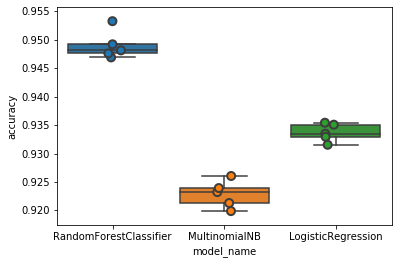

In [37]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


CV = 5  # 5 splits
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

features = df['review_clean']
labels = df['sent_label']

for model in models:
    
  #kfold = KFold(n_splits=CV, shuffle=True, random_state=1) 
   kfold = StratifiedKFold(n_splits=CV, shuffle=True, random_state=1) 

   model_name = model.__class__.__name__
  
   cls_pipe = make_pipeline(TfidfVectorizer(**tfidf_params), model)
    
   accuracies = cross_val_score(cls_pipe, features, labels, scoring='accuracy', cv=kfold)
  
   for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

# plot
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [38]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LogisticRegression        0.933679
MultinomialNB             0.922879
RandomForestClassifier    0.948997
Name: accuracy, dtype: float64

In [39]:
cv_df

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.953238
1,RandomForestClassifier,1,0.949179
2,RandomForestClassifier,2,0.948112
3,RandomForestClassifier,3,0.946876
4,RandomForestClassifier,4,0.947582
5,MultinomialNB,0,0.919887
6,MultinomialNB,1,0.921299
7,MultinomialNB,2,0.923226
8,MultinomialNB,3,0.923932
9,MultinomialNB,4,0.926050


With cross validation, RandomForest is still has the highest accuracy
followed by Multinomial Naive Bayes and lastly LogisticRegression